# Map data to a normal distribution

This example demonstrates the use of the Box-Cox and Yeo-Johnson transforms through PowerTransformer to map data from various distributions to a normal distribution.

The power transform is useful as a transformation in modeling problems where homoscedasticity and normality are desired. Below are examples of Box-Cox and Yeo-Johnwon applied to six different probability distributions: Lognormal, Chi-squared, Weibull, Gaussian, Uniform, and Bimodal.

Note that the transformations successfully map the data to a normal distribution when applied to certain datasets, but are ineffective with others. This highlights the importance of visualizing the data before and after transformation.

Also note that even though Box-Cox seems to perform better than Yeo-Johnson for lognormal and chi-squared distributions, keep in mind that Box-Cox does not support inputs with negative values.

For comparison, we also add the output from QuantileTransformer. It can force any arbitrary distribution into a gaussian, provided that there are enough training samples (thousands). Because it is a non-parametric method, it is harder to interpret than the parametric ones (Box-Cox and Yeo-Johnson).

On “small” datasets (less than a few hundred points), the quantile transformer is prone to overfitting. The use of the power transform is then recommended.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

N_SAMPLES = 1000
FONT_SIZE = 6
BINS = 30


rng = np.random.RandomState(304)

bc = PowerTransformer(method="box-cox")
yj = PowerTransformer(method="yeo-johnson")

# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(
    n_quantiles=500, output_distribution="normal", random_state=rng
)
size = (N_SAMPLES, 1)

In [2]:
# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ("Lognormal", X_lognormal),
    ("Chi-squared", X_chisq),
    ("Weibull", X_weibull),
    ("Gaussian", X_gaussian),
    ("Uniform", X_uniform),
    ("Bimodal", X_bimodal),
]

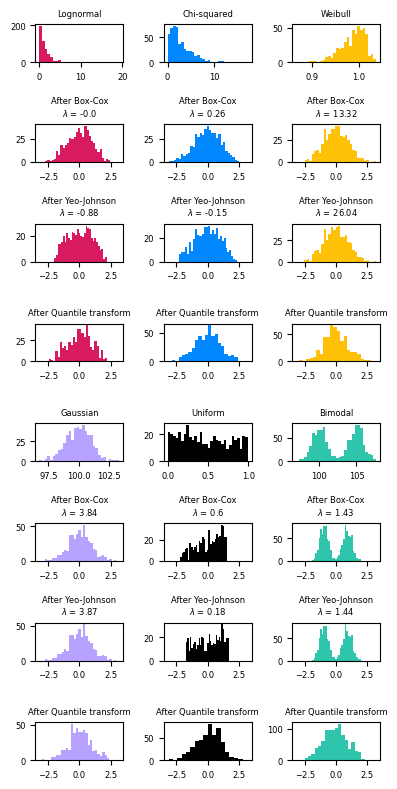

In [3]:
colors = ["#D81B60", "#0188FF", "#FFC107", "#B7A2FF", "#000000", "#2EC5AC"]

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [
    (0, 3, 6, 9),
    (1, 4, 7, 10),
    (2, 5, 8, 11),
    (12, 15, 18, 21),
    (13, 16, 19, 22),
    (14, 17, 20, 23),
]
axes_list = [(axes[i], axes[j], axes[k], axes[l]) for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=0.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis="both", which="major", labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
        (ax_bc, ax_yj, ax_qt),
        (X_trans_bc, X_trans_yj, X_trans_qt),
        ("Box-Cox", "Yeo-Johnson", "Quantile transform"),
        (lmbda_bc, lmbda_yj, None),
    ):
        ax.hist(X_trans, color=color, bins=BINS)
        title = "After {}".format(meth_name)
        if lmbda is not None:
            title += "\n$\\lambda$ = {}".format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis="both", which="major", labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()


1. **Lognormal Distribution**:
   - **Purpose**: Models data where values grow multiplicatively, often used for positively skewed data.
   - **Characteristics**: Values are always positive, and the distribution is skewed to the right. Common in modeling incomes, stock prices, and biological data (e.g., sizes of organisms).

2. **Chi-squared Distribution**:
   - **Purpose**: Used in hypothesis testing, such as in chi-squared tests for independence and goodness-of-fit.
   - **Characteristics**: Only takes positive values and is right-skewed. It’s the distribution of the sum of the squares of independent standard normal variables. Common in statistical tests.

3. **Weibull Distribution**:
   - **Purpose**: Common in reliability and life data analysis (e.g., time-to-failure data).
   - **Characteristics**: Can model increasing or decreasing hazard rates, making it flexible for different types of failure analysis. The shape of the distribution depends on its parameters.

4. **Gaussian (Normal) Distribution**:
   - **Purpose**: Represents natural phenomena where values cluster around a mean, like heights, IQ scores, and measurement errors.
   - **Characteristics**: Symmetric, bell-shaped curve. The mean, median, and mode are all the same. It’s defined by its mean and standard deviation, with most values falling within 1-2 standard deviations from the mean.

5. **Uniform Distribution**:
   - **Purpose**: Models scenarios where all outcomes are equally likely, such as random number generation.
   - **Characteristics**: All values within a specified range are equally probable, with a flat (rectangular) shape. Useful for simulations and generating random samples.

6. **Bimodal Distribution**:
   - **Purpose**: Models data with two distinct peaks, suggesting the presence of two different processes or populations.
   - **Characteristics**: Has two modes or peaks. It can be a mix of two normal distributions and often appears when data comes from two different groups (e.g., performance in two different classes of students).
